In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\student-mat.csv", sep=";")

In [3]:
df = df[df.G3 != 0] #Removed outliers

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#cols = ["schoolsup","famsup","paid","activities","internet" ,"romantic"]
df.internet = df.internet.map(dict(yes = 1, no = 0))
df.schoolsup = df.schoolsup.map(dict(yes = 1, no = 0))
df.famsup = df.famsup.map(dict(yes = 1, no = 0))
df.paid = df.paid.map(dict(yes = 1, no = 0))
df.activities = df.activities.map(dict(yes = 1, no = 0))
df.romantic = df.romantic.map(dict(yes = 1, no = 0))

In [6]:
df.internet

0      0
1      1
2      1
3      1
4      0
      ..
390    0
391    1
392    0
393    1
394    1
Name: internet, Length: 357, dtype: int64

In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery       object
higher        object
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
cols = ["schoolsup","famsup","paid","activities","internet" ,"romantic"]

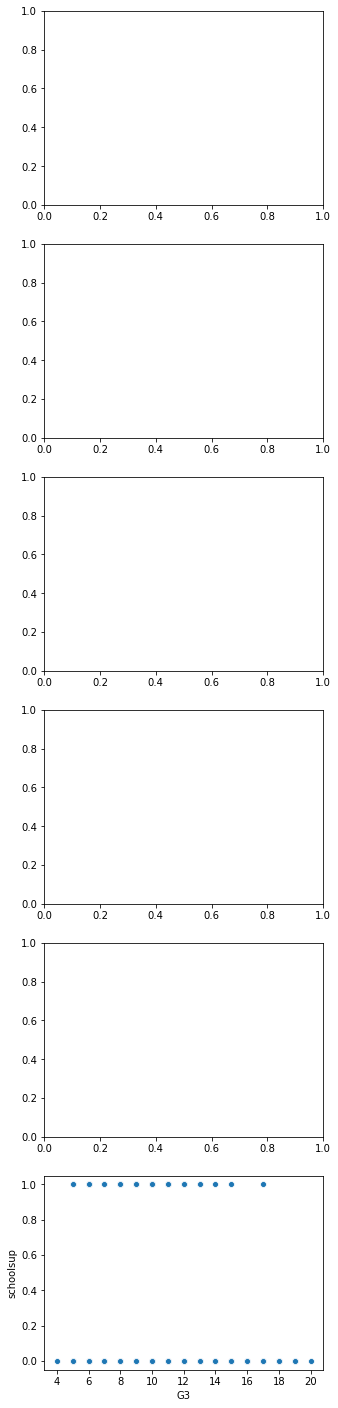

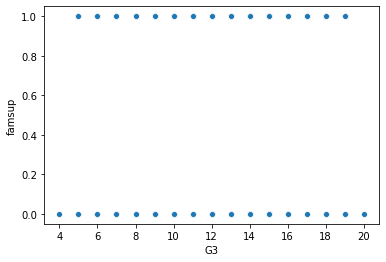

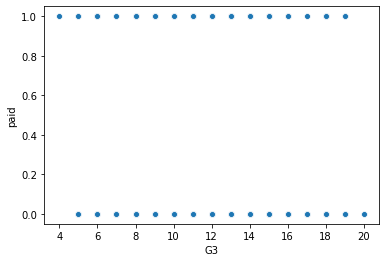

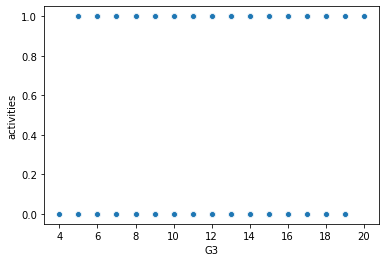

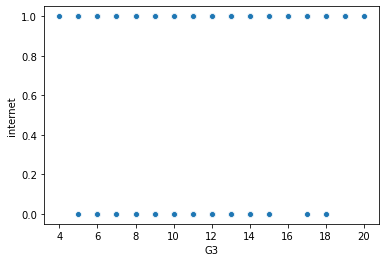

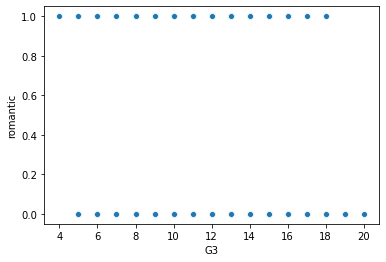

In [16]:
#Plots countplots of multiple columns 
fig, ax = plt.subplots(6, figsize=(5,25))
for col in cols:
    sns.scatterplot(x = "G3" ,y = col, data=df)
    plt.show()

In [10]:
X = df[["schoolsup","famsup","paid","activities","internet","romantic","absences","studytime","failures","G1","G2"]]
y = df["G3"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

In [12]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [13]:
pred = linear.predict(X_test)

In [14]:
linear.score(X_test, y_test)

0.9372848577938546

In [15]:
for i in range(len(pred)):
    print(pred[i],np.array(y_test)[i])

6.318034359767543 6
8.33375874831588 7
17.194764519331528 18
15.975653064958664 16
11.257603077060038 11
12.336092983223187 11
8.652936461080978 8
12.94731839457048 13
11.153681462703421 11
7.574910258532375 10
17.882490436381268 18
15.494828667988047 15
18.00254537370394 18
8.24686777538036 8
12.058792569670015 11
17.871074165398213 19
15.839109786839535 15
18.067318431191694 18
14.147243151857845 14
12.456055867983384 12
10.310050772613625 10
7.285379980335517 7
13.472485955381401 12
15.195317038395936 15
15.43744293798857 16
18.44106222926832 18
12.371963842834058 12
11.349913108951363 10
9.009460216656876 10
15.495772637259654 17
12.193797301151665 10
12.213189617157497 12
15.276783889748097 16
9.724513854797541 11
17.29729982611073 17
13.291352455159517 13
